# ЛР №2 Кокозов

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

In [32]:
data = pd.read_csv('top250-00-19.csv', sep=',')

In [33]:
data.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [34]:
data.shape

(4700, 10)

In [35]:
data.isnull().sum()

Name               0
Position           0
Age                0
Team_from          0
League_from        0
Team_to            0
League_to          0
Season             0
Market_value    1260
Transfer_fee       0
dtype: int64

In [36]:
data.dtypes

Name             object
Position         object
Age               int64
Team_from        object
League_from      object
Team_to          object
League_to        object
Season           object
Market_value    float64
Transfer_fee      int64
dtype: object

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [38]:
data.describe()

,Age,Market_value,Transfer_fee
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


In [39]:
data_new_1 = data.dropna(axis = 0, how="any")

In [41]:
data_new_1.isnull().sum()

Name            0
Position        0
Age             0
Team_from       0
League_from     0
Team_to         0
League_to       0
Season          0
Market_value    0
Transfer_fee    0
dtype: int64

In [42]:
data_new_1.shape

(3440, 10)

In [43]:
total_count = data.shape[0]
Ncols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        Ncols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
print(Ncols)

Колонка Market_value. Тип данных float64. Количество пустых значений 1260, 26.81%.
['Market_value']


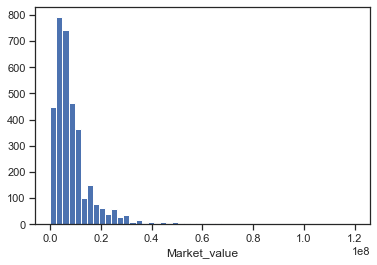

In [44]:
for col in data[Ncols]:
    plt.hist(data[Ncols][col], 50)
    plt.xlabel(col)
    plt.show()

In [46]:
data_num_Market_value = data[Ncols][['Market_value']]
data_num_Market_value.head()

,Market_value
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [47]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [48]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Market_value)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [49]:
strategies=['mean', 'median', 'most_frequent']

In [50]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_TMUs)
    return data_num_imp[mask_missing_values_only]

In [51]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([8622469.47674419, 8622469.47674419, 8622469.47674419, ...,
        8622469.47674419, 8622469.47674419, 8622469.47674419]))

In [52]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([6000000., 6000000., 6000000., ..., 6000000., 6000000., 6000000.]))

In [53]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([5000000., 5000000., 5000000., ..., 5000000., 5000000., 5000000.]))

In [54]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [55]:
data[['Market_value']].describe()

,Market_value
count,3.440000e+03
mean,8.622469e+06
std,8.795181e+06
min,5.000000e+04
25%,3.500000e+06
50%,6.000000e+06
75%,1.000000e+07
max,1.200000e+08


In [56]:
test_num_impute_col(data, 'Market_value', strategies[0])

('Market_value', 'mean', 1260, 8622469.476744186, 8622469.476744186)

In [57]:
test_num_impute_col(data, 'Market_value', strategies[1])

('Market_value', 'median', 1260, 6000000.0, 6000000.0)

In [58]:
test_num_impute_col(data, 'Market_value', strategies[2])

('Market_value', 'most_frequent', 1260, 5000000.0, 5000000.0)

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [60]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Market_value']])

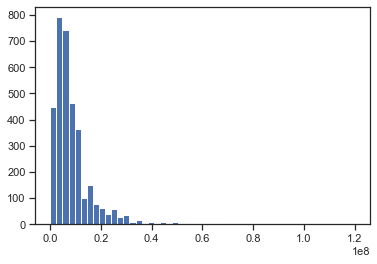

In [61]:
plt.hist(data['Market_value'], 50)
plt.show()

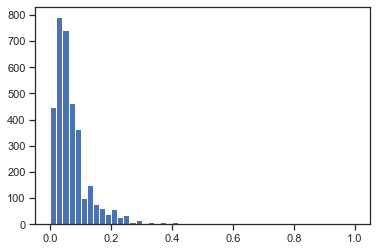

In [62]:
plt.hist(sc1_data, 50)
plt.show()